In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Prime Awards (this is what we want)
contracts = pd.read_csv('../data/Contracts_PrimeAwardSummaries_2026-01-09_H17M01S51.csv')

# Basic info
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"Total contracts: {len(contracts):,}")
print(f"Total columns: {len(contracts.columns)}")
print(f"\nDate range: {contracts['action_date'].min()} to {contracts['action_date'].max()}" if 'action_date' in contracts.columns else "")

print("\n" + "=" * 60)
print("COLUMN NAMES")
print("=" * 60)
for i, col in enumerate(contracts.columns, 1):
    print(f"{i}. {col}")

print("\n" + "=" * 60)
print("FIRST 3 CONTRACTS")
print("=" * 60)
print(contracts.head(3))

print("\n" + "=" * 60)
print("MISSING DATA")
print("=" * 60)
missing = contracts.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing.head(10))

DATASET OVERVIEW
Total contracts: 141
Total columns: 286


COLUMN NAMES
1. contract_award_unique_key
2. award_id_piid
3. parent_award_agency_id
4. parent_award_agency_name
5. parent_award_id_piid
6. disaster_emergency_fund_codes
7. outlayed_amount_from_COVID-19_supplementals
8. obligated_amount_from_COVID-19_supplementals
9. outlayed_amount_from_IIJA_supplemental
10. obligated_amount_from_IIJA_supplemental
11. total_obligated_amount
12. total_outlayed_amount
13. current_total_value_of_award
14. potential_total_value_of_award
15. award_base_action_date
16. award_base_action_date_fiscal_year
17. award_latest_action_date
18. award_latest_action_date_fiscal_year
19. period_of_performance_start_date
20. period_of_performance_current_end_date
21. period_of_performance_potential_end_date
22. ordering_period_end_date
23. solicitation_date
24. awarding_agency_code
25. awarding_agency_name
26. awarding_sub_agency_code
27. awarding_sub_agency_name
28. awarding_office_code
29. awarding_office_name

In [ ]:
# Let's look at the key columns we care about
key_columns = [
    'recipient_name',
    'recipient_parent_name', 
    'total_obligated_amount',
    'current_total_value_of_award',
    'award_base_action_date',
    'award_latest_action_date',
    'awarding_agency_name',
    'awarding_sub_agency_name',
    'product_or_service_code_description',
    'naics_description',
    'primary_place_of_performance_state_name'
]

print("=" * 80)
print("KEY COLUMNS - FIRST 5 CONTRACTS")
print("=" * 80)
print(contracts[key_columns].head())

print("\n" + "=" * 80)
print("TOP 10 CONTRACTORS BY TOTAL OBLIGATED AMOUNT")
print("=" * 80)
top_contractors = contracts.groupby('recipient_name')['total_obligated_amount'].sum().sort_values(ascending=False).head(10)
for rank, (company, amount) in enumerate(top_contractors.items(), 1):
    print(f"{rank}. {company}: ${amount:,.0f}")

print("\n" + "=" * 80)
print("TOTAL MARKET SIZE")
print("=" * 80)
total_spending = contracts['total_obligated_amount'].sum()
print(f"Total Counter-UAS Contract Value: ${total_spending:,.0f}")
print(f"Average Contract Size: ${contracts['total_obligated_amount'].mean():,.0f}")

print("\n" + "=" * 80)
print("WHICH AGENCIES ARE BUYING?")
print("=" * 80)
agencies = contracts.groupby('awarding_agency_name')['total_obligated_amount'].sum().sort_values(ascending=False)
for agency, amount in agencies.items():
    print(f"{agency}: ${amount:,.0f}")

print("\n" + "=" * 80)
print("SPENDING BY YEAR")
print("=" * 80)
# Convert date to datetime and extract year
contracts['year'] = pd.to_datetime(contracts['award_base_action_date']).dt.year
yearly_spending = contracts.groupby('year')['total_obligated_amount'].sum().sort_index()
for year, amount in yearly_spending.items():
    print(f"{year}: ${amount:,.0f}")

KEY COLUMNS - FIRST 5 CONTRACTS
                  recipient_name          recipient_parent_name  \
0            AEROVIRONMENT, INC.            AEROVIRONMENT, INC.   
1                      IMSAR LLC                      IMSAR LLC   
2     SENECA GLOBAL SERVICES LLC     SENECA GLOBAL SERVICES LLC   
3  SENECA FEDERAL SOLUTIONS, LLC  SENECA FEDERAL SOLUTIONS, LLC   
4        D-FEND SOLUTIONS AD INC        D-FEND SOLUTIONS AD INC   

   total_obligated_amount  current_total_value_of_award  \
0               354251.64                     354251.64   
1                73616.30                      73616.30   
2              4499998.00                    4499998.00   
3                40000.00                      40000.00   
4               799000.00                     799000.00   

  award_base_action_date award_latest_action_date        awarding_agency_name  \
0             2014-09-23               2022-04-08       Department of Defense   
1             2019-01-31               2021-06-2

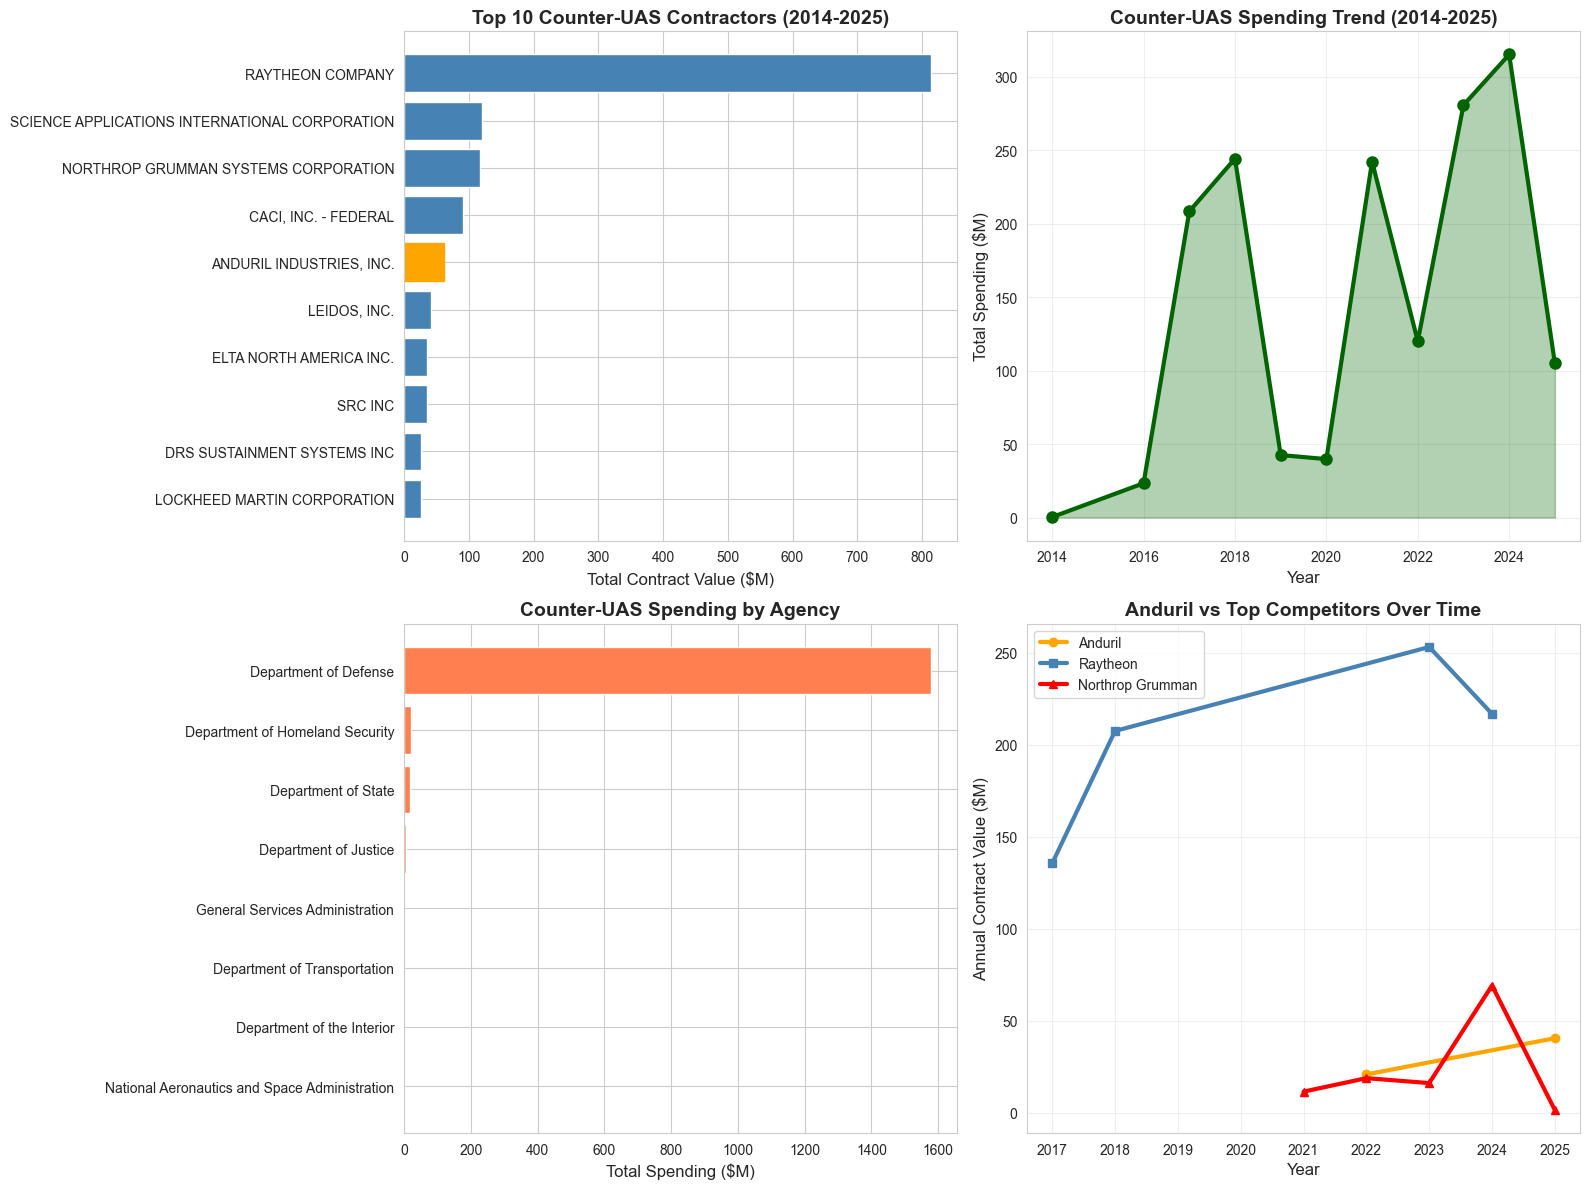

✓ Charts saved to output/counter_uas_market_analysis.png


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Top 10 Contractors Bar Chart
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Chart 1: Top Contractors
top_10 = contracts.groupby('recipient_name')['total_obligated_amount'].sum().sort_values(ascending=False).head(10)
axes[0, 0].barh(range(len(top_10)), top_10.values / 1e6, color='steelblue')
axes[0, 0].set_yticks(range(len(top_10)))
axes[0, 0].set_yticklabels(top_10.index, fontsize=10)
axes[0, 0].set_xlabel('Total Contract Value ($M)', fontsize=12)
axes[0, 0].set_title('Top 10 Counter-UAS Contractors (2014-2025)', fontsize=14, fontweight='bold')
axes[0, 0].invert_yaxis()
# Highlight Anduril
for i, (name, value) in enumerate(top_10.items()):
    if 'ANDURIL' in name:
        axes[0, 0].get_children()[i].set_color('orange')

# Chart 2: Spending by Year
yearly = contracts.groupby('year')['total_obligated_amount'].sum() / 1e6
axes[0, 1].plot(yearly.index, yearly.values, marker='o', linewidth=3, markersize=8, color='darkgreen')
axes[0, 1].fill_between(yearly.index, yearly.values, alpha=0.3, color='darkgreen')
axes[0, 1].set_xlabel('Year', fontsize=12)
axes[0, 1].set_ylabel('Total Spending ($M)', fontsize=12)
axes[0, 1].set_title('Counter-UAS Spending Trend (2014-2025)', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Chart 3: Agency Spending
agencies = contracts.groupby('awarding_agency_name')['total_obligated_amount'].sum().sort_values(ascending=False)
axes[1, 0].barh(range(len(agencies)), agencies.values / 1e6, color='coral')
axes[1, 0].set_yticks(range(len(agencies)))
axes[1, 0].set_yticklabels(agencies.index, fontsize=10)
axes[1, 0].set_xlabel('Total Spending ($M)', fontsize=12)
axes[1, 0].set_title('Counter-UAS Spending by Agency', fontsize=14, fontweight='bold')
axes[1, 0].invert_yaxis()

# Chart 4: Anduril vs Competitors Over Time
anduril_yearly = contracts[contracts['recipient_name'] == 'ANDURIL INDUSTRIES, INC.'].groupby('year')['total_obligated_amount'].sum() / 1e6
raytheon_yearly = contracts[contracts['recipient_name'] == 'RAYTHEON COMPANY'].groupby('year')['total_obligated_amount'].sum() / 1e6
northrop_yearly = contracts[contracts['recipient_name'] == 'NORTHROP GRUMMAN SYSTEMS CORPORATION'].groupby('year')['total_obligated_amount'].sum() / 1e6

axes[1, 1].plot(anduril_yearly.index, anduril_yearly.values, marker='o', label='Anduril', linewidth=3, color='orange')
axes[1, 1].plot(raytheon_yearly.index, raytheon_yearly.values, marker='s', label='Raytheon', linewidth=3, color='steelblue')
axes[1, 1].plot(northrop_yearly.index, northrop_yearly.values, marker='^', label='Northrop Grumman', linewidth=3, color='red')
axes[1, 1].set_xlabel('Year', fontsize=12)
axes[1, 1].set_ylabel('Annual Contract Value ($M)', fontsize=12)
axes[1, 1].set_title('Anduril vs Top Competitors Over Time', fontsize=14, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../output/counter_uas_market_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Charts saved to output/counter_uas_market_analysis.png")